In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk

from matplotlib import style
style.use('dark_background')

## Sail Dataset

In [2]:
sail_data = pd.read_csv('sailing-custom-python.tab', delimiter='\t')
sail_data.head()

,Outlook,Company,Sailboat,Sail
0,rainy,big,big,yes
1,rainy,big,small,yes
2,rainy,med,big,no
3,rainy,med,small,no
4,sunny,big,big,yes


In [3]:
X = sail_data.drop(['Sail'],axis = 1)
y = sail_data['Sail']

In [4]:
X_dummy = pd.get_dummies(X)
X_dummy

,Outlook_rainy,Outlook_sunny,Company_big,Company_med,Company_no,Sailboat_big,Sailboat_small
0,1,0,1,0,0,1,0
1,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,0,1,0
5,0,1,1,0,0,0,1
6,0,1,0,1,0,1,0
7,0,1,0,1,0,1,0
8,0,1,0,1,0,0,1
9,0,1,0,0,1,0,1


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

class_labels = le.inverse_transform([0,1])
le.transform(y)

print(np.array(y))
print('Labels to normalised encoding')
print(le.transform(y))
print('Labels to original encoding')
print(class_labels)

['yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes']
Labels to normalised encoding
[1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1]
Labels to original encoding
['no' 'yes']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13, 7)
(4, 7)
(13,)
(4,)


In [15]:
from sklearn import tree
from sklearn import metrics
clfSail = tree.DecisionTreeClassifier()
clfSail = clfSail.fit(X_train, y_train)

In [16]:
predictions = clfSail.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          no       0.33      1.00      0.50         1
         yes       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



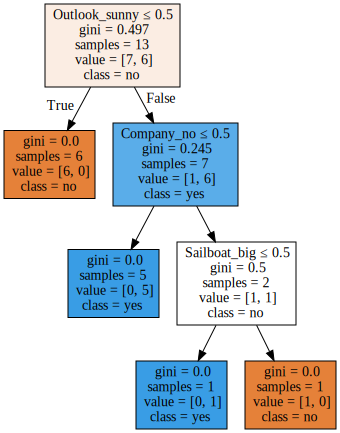

In [21]:
import graphviz

dot_data = tree.export_graphviz(clfSail, out_file=None, feature_names=X_train.columns, class_names=class_labels, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Zoo dataset